<a href="https://colab.research.google.com/github/ishaan1234/hello-world/blob/main/DL%20Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mounting to drive and Unzipping the files 

In [111]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
!unzip "/content/drive/MyDrive/DeepLearning_Hackathon/archive.zip" -d "/content/drive/MyDrive/DeepLearning_Hackathon"

unzip:  cannot find or open /content/drive/MyDrive/DeepLearning_Hackathon/archive.zip, /content/drive/MyDrive/DeepLearning_Hackathon/archive.zip.zip or /content/drive/MyDrive/DeepLearning_Hackathon/archive.zip.ZIP.


In [113]:
import tensorflow as tf
import pandas as pd
import tensorflow_hub as hub
import numpy as np
import os


In [114]:
new_train_from_casting_def=[]
def_front_path="/content/drive/MyDrive/Deep Learning Hackathon/casting_data/casting_data/train/def_front/"
for img_name in os.listdir("/content/drive/MyDrive/Deep Learning Hackathon/casting_data/casting_data/train/def_front"):
  new_train_from_casting_def.append(def_front_path+img_name)

In [115]:
new_train_from_casting_ok=[]
ok_front_path="/content/drive/MyDrive/Deep Learning Hackathon/casting_data/casting_data/train/ok_front/"
for img_name in os.listdir("/content/drive/MyDrive/Deep Learning Hackathon/casting_data/casting_data/train/ok_front"):
  new_train_from_casting_ok.append(ok_front_path+img_name)

In [116]:
from matplotlib.pyplot import imread
image= imread(new_train_from_casting_def[0])
image.shape

(300, 300, 3)

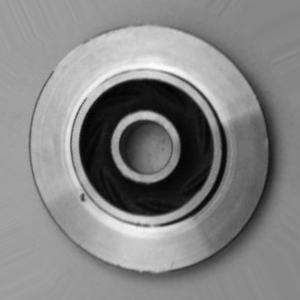

In [117]:
from IPython.display import Image
Image(f"{new_train_from_casting_def[0]}")

In [118]:
IMG_SIZE=244
labels=["defective", "ok"] #0=Defective; 1=OK
def img_with_label_tensors(img_path, label):

  image= tf.io.read_file(img_path) #Bas file path store ho rha
  
  #Turn jpg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image=tf.io.decode_jpeg(image, channels=3) #Path ki image converted to Tensors
  
  # Convert the colour channel values from 0-255 to 0-1 values
  image= tf.image.convert_image_dtype(image, tf.float32)

  #Resize the image to (224,224)
  image=tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  label=tf.constant(label)

  return image, label


In [119]:
abc= img_with_label_tensors(new_train_from_casting_def[0], labels[0])

In [120]:
abc

(<tf.Tensor: shape=(244, 244, 3), dtype=float32, numpy=
 array([[[0.61960787, 0.61960787, 0.61960787],
         [0.61960787, 0.61960787, 0.61960787],
         [0.61960787, 0.61960787, 0.61960787],
         ...,
         [0.5289618 , 0.5289618 , 0.5289618 ],
         [0.5289618 , 0.5289618 , 0.5289618 ],
         [0.5289618 , 0.5289618 , 0.5289618 ]],
 
        [[0.61960787, 0.61960787, 0.61960787],
         [0.61960787, 0.61960787, 0.61960787],
         [0.61960787, 0.61960787, 0.61960787],
         ...,
         [0.5254902 , 0.5254902 , 0.5254902 ],
         [0.5254902 , 0.5254902 , 0.5254902 ],
         [0.5254902 , 0.5254902 , 0.5254902 ]],
 
        [[0.6173578 , 0.6173578 , 0.6173578 ],
         [0.6181324 , 0.6181324 , 0.6181324 ],
         [0.61960787, 0.61960787, 0.61960787],
         ...,
         [0.5254902 , 0.5254902 , 0.5254902 ],
         [0.5254902 , 0.5254902 , 0.5254902 ],
         [0.5254902 , 0.5254902 , 0.5254902 ]],
 
        ...,
 
        [[0.605593  , 0.605593  